In [49]:
import os

data_dir = "data/littlepictures_data/lc-1"

if not os.path.isdir(data_dir):
    print("cloning data")
    os.system("git clone --depth 1 https://github.com/littlepictures/datasets data/littlepictures_data")
else:
    print("data already cloned, skipping")

csvfiles = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

num_csvfiles = len(csvfiles)
print(f"Total files found: {num_csvfiles}. Sample of csv files found:")
print(csvfiles[0:5])

data already cloned, skipping
Total files found: 181. Sample of csv files found:
['W. Sahara_lc_class_areas.csv', 'Ghana_lc_class_areas.csv', 'Syria_lc_class_areas.csv', 'Japan_lc_class_areas.csv', 'Malaysia_lc_class_areas.csv']


In [101]:
import pandas as pd

# Join all files into a single tidy dataset
df = None
for f in csvfiles:
    fn = f"{data_dir}/{f}"
    country = f.split("_lc_class_areas.csv")
    
    # new_df = pd.read_csv(fn, index_col="year")
    new_df = pd.read_csv(fn)
    new_df["country"] = country[0]
    if df is None:
        df = new_df
    else:
        df = pd.concat([df, new_df])

# Rearrange column for easy viewing of country
cols = list(df.columns.values)
assert(cols.pop() == "country")
cols.insert(0, "country")
df = df[cols]

df.head()

,country,year,Rain-fed cropland,Rain-fed cropland - herbaceous cover,Rain-fed cropland - tree or shrub cover,Irrigated or post-flooding cropland,"Mosaic: > 50% cropland/< 50 % natural tree, shrub, herbaceous cover","Mosaic: > 50% natural tree, shrub, herbaceous cover/< 50% cropland",> 15% broad-leaved evergreen tree cover,> 15 % broad-leaved deciduous tree cover,...,Sparse vegetation: < 15 % herbaceous cover,Flooded tree cover - fresh or brackish water,Flooded tree cover - saline water,"Flooded shrub or herbaceous cover - fresh, saline, or brackish water",Urban areas,Bare areas (total vegetative cover < 4%),Consolidated bare areas,Unconsolidated bare areas,Water body,Permanent snow and ice
0,W. Sahara,1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,96909.955191,14.438195,1.601698,11.6461,0.0
1,W. Sahara,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,96909.955191,14.438195,1.601698,11.6461,0.0
2,W. Sahara,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,96909.955191,14.438195,1.601698,11.6461,0.0
3,W. Sahara,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,96909.955191,14.438195,1.601698,11.6461,0.0
4,W. Sahara,1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,96909.955191,14.438195,1.601698,11.6461,0.0


In [102]:
import re
# According to the user guide here(https://climate.esa.int/media/documents/CCI_Land_Cover_PUG_v2.0.pdf, Table 3-3)
# "forest" is defined as:

p = re.compile(".*tree cover.*")
forest_cols = [s for s in cols if p.match(s) and not "Sparse vegetation" in s]
forest_cols

['> 15% broad-leaved evergreen tree cover',
 '> 15 % broad-leaved deciduous tree cover',
 '> 40% broad-leaved deciduous tree cover',
 '15 %-40 % broad-leaved deciduous tree cover',
 '> 15% needle-leaved evergreen tree cover',
 '> 40% needle-leaved evergreen tree cover',
 '15 %-40 % needle-leaved evergreen tree cover',
 '> 15% needle-leaved deciduous tree cover',
 '> 40% needle-leaved deciduous tree cover',
 '15 % -40 % needle-leaved deciduous tree cover',
 'Mixed leaf-type (broad-leaved and needle- leaved) tree cover',
 'Flooded tree cover - fresh or brackish water',
 'Flooded tree cover - saline water']

In [103]:
# data sanity assertion:

# We have x files, y years. x * y should equal the number of rows in the dataset
assert(len(df.index.unique()) * num_csvfiles == len(df))

# Assert no null values
assert(not df.isnull().values.any())

In [130]:
forest_data = df[forest_cols + ["year"]].groupby("year").sum()

# print(forest_cols)
forest_data = forest_data.reset_index()
forest_data = forest_data.melt(id_vars="year")
forest_data

,year,variable,value
0,1992,> 15% broad-leaved evergreen tree cover,1.439573e+07
1,1993,> 15% broad-leaved evergreen tree cover,1.436600e+07
2,1994,> 15% broad-leaved evergreen tree cover,1.436593e+07
3,1995,> 15% broad-leaved evergreen tree cover,1.427233e+07
4,1996,> 15% broad-leaved evergreen tree cover,1.425220e+07
...,...,...,...
307,2011,Flooded tree cover - saline water,1.711873e+05
308,2012,Flooded tree cover - saline water,1.711774e+05
309,2013,Flooded tree cover - saline water,1.711547e+05
310,2014,Flooded tree cover - saline water,1.719019e+05


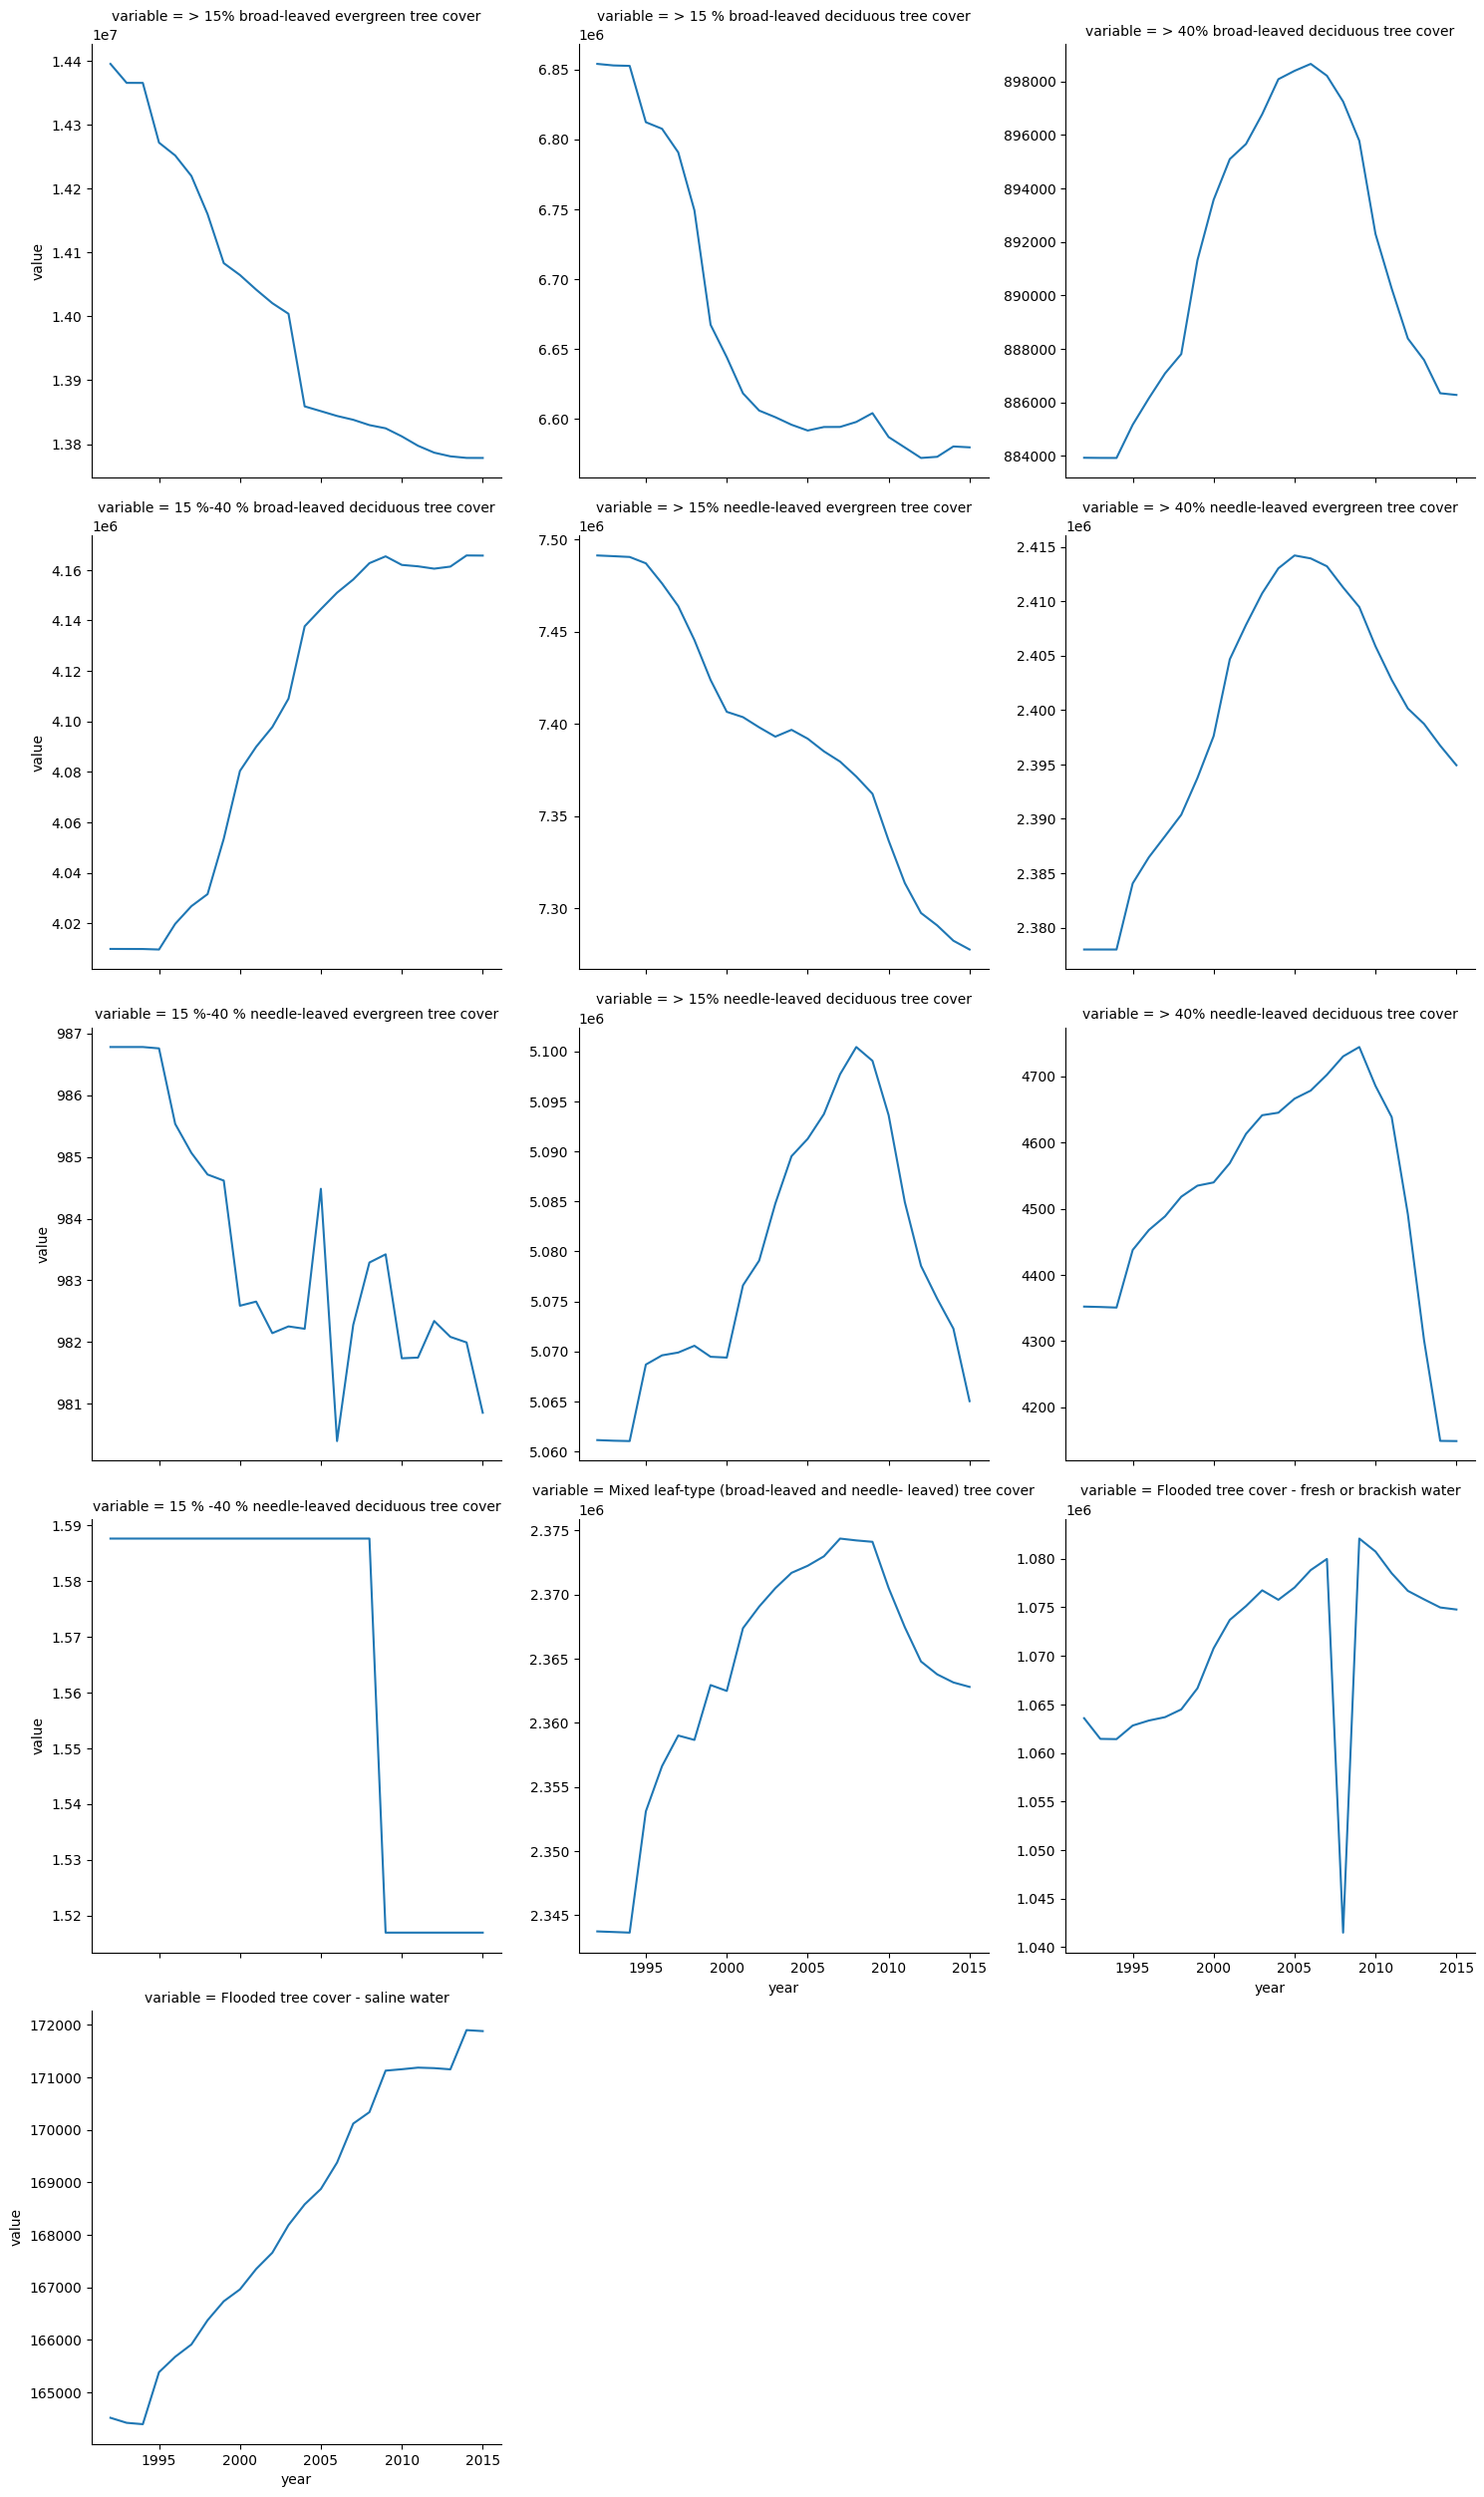

In [175]:
import seaborn as sns

sns.relplot(data=forest_data, kind="line", x="year", y="value", col="variable", col_wrap=3, facet_kws={ "sharey": False })

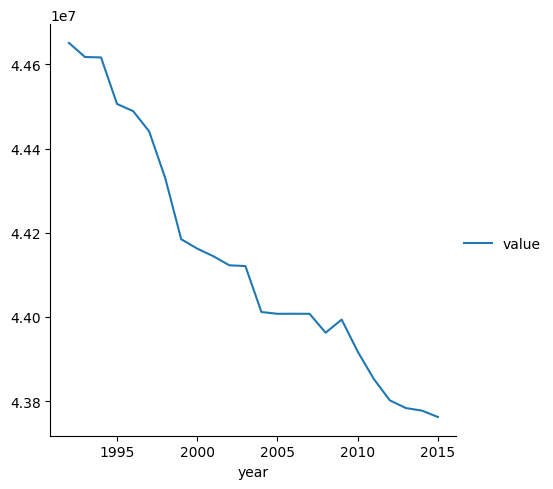

In [178]:
simplified = forest_data.groupby("year").sum().drop(axis="columns", labels="variable")
sns.relplot(simplified, kind="line")

In [179]:
range = simplified.max() - simplified.min()

aug_range = (range/0.35).value # This means the visualization will show a reduction of 35% of overall.
new_min = (simplified.max() - aug_range).value



In [180]:
simplified["value"] = (simplified["value"] - new_min) / aug_range

In [182]:
simplified["value"]

year
1992    1.000000
1993    0.986774
1994    0.986398
1995    0.942833
1996    0.936191
1997    0.917255
1998    0.873699
1999    0.816297
2000    0.807522
2001    0.800441
2002    0.791930
2003    0.791206
2004    0.748231
2005    0.746552
2006    0.746606
2007    0.746552
2008    0.728860
2009    0.741161
2010    0.711225
2011    0.685695
2012    0.665630
2013    0.658378
2014    0.655993
2015    0.650000
Name: value, dtype: float64